## 各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 
    > 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理20% 
    > 注：对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income)  /营收(Total Revenue) （40 分）

思路：  
图表即是数据，重点在于拿到对应的数据，再设置适当的绘图参数进行优化和美化

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签，不设的话中文全是框框
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [3]:
fdt = pd.read_csv('nyse/fundamentals.csv')
pd.set_option('display.max_columns',None)      # set to display all columns
fdt.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322

In [4]:
sec = pd.read_csv('nyse/securities.csv')
sec.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


需要用到的列：  
fdt  
'Ticker Symbol', 'For Year', 'Net Income', 'Total Revenue', 'Fixed Assets', 'Total Assets'  
sec  
'Ticker symbol', 'GICS Sector'   

1.

In [5]:
fdt1 = fdt[fdt['For Year']==2015.0].filter(items=['Ticker Symbol','Net Income']).nlargest(100,'Net Income')
fdt1.head()

,Ticker Symbol,Net Income
10,AAPL,5.339400e+10
886,JPM,2.444200e+10
1685,WFC,2.289400e+10
691,GILD,1.810800e+10
1669,VZ,1.787900e+10


In [6]:
sec1 = sec.filter(items=['GICS Sector','Ticker symbol']).rename(columns={'Ticker symbol':'Ticker Symbol',})
sec1.head()

,GICS Sector,Ticker Symbol
0,Industrials,MMM
1,Health Care,ABT
2,Health Care,ABBV
3,Information Technology,ACN
4,Information Technology,ATVI


In [7]:
dat1 = pd.merge(sec1,fdt1).groupby('GICS Sector')['GICS Sector'].count()
dat1

GICS Sector
Consumer Discretionary         12
Consumer Staples                9
Energy                          5
Financials                     19
Health Care                    13
Industrials                    18
Information Technology         12
Materials                       3
Real Estate                     1
Telecommunications Services     3
Utilities                       5
Name: GICS Sector, dtype: int64

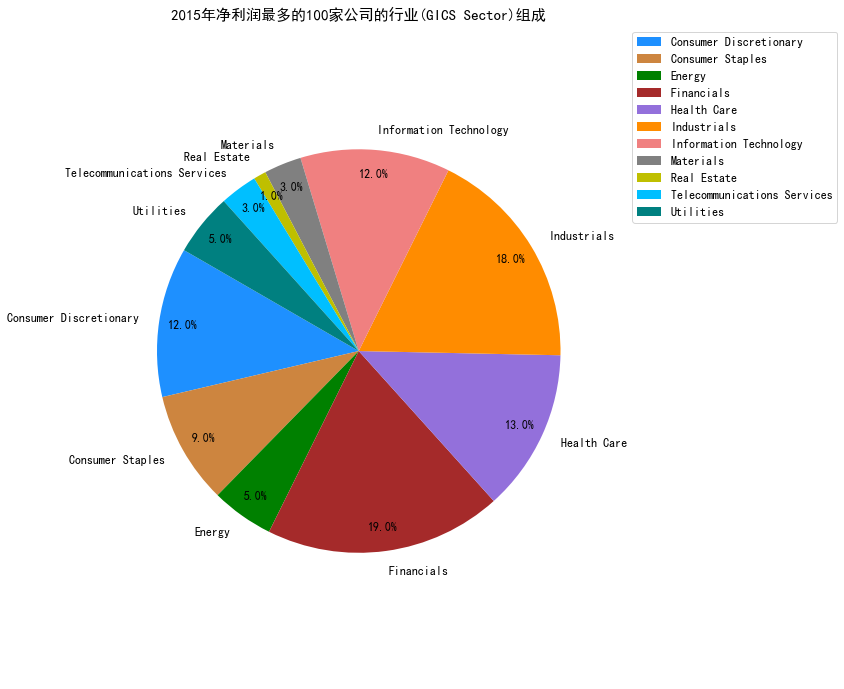

In [8]:
fig1 = plt.figure(figsize=(8,12))

labels = dat1.index
sizes = dat1
# 设置自定义颜色，默认颜色超过10个就开始出现重复
colors = ['dodgerblue','peru','green','brown','mediumpurple','darkorange',
         'lightcoral','grey','y','deepskyblue','teal']      

plt.pie(sizes, labels = labels, autopct = '%1.1f%%',textprops={'fontsize': 12}, colors = colors,
        shadow = False, startangle = 150, labeldistance = 1.1,  pctdistance=0.88)

'''
autopct 圆里面的文本格式，%1.1f%%表示小数有一位，并带上百分号
textprops 字体设置
shadow 饼是否有阴影
startangle 起始角度，0表示从0开始逆时针转，一般选择从90度开始比较好看
labeldistance 文本的位置离远点有多远，1.1指1.1倍半径的位置
pctdistance 百分比的text离圆心的距离，如果太近，小的值会重叠在一起
'''

plt.title("2015年净利润最多的100家公司的行业(GICS Sector)组成", fontsize = 15) 

plt.axis('equal')  # 使饼图是圆形而不是椭圆
plt.legend(bbox_to_anchor=(1.1,1), fontsize = 12) # 设置图例并且调整距离使其不与图形重叠
plt.show()  

2.

In [9]:
fdt2 = fdt[fdt['For Year']==2015.0].filter(items=['Ticker Symbol','Total Revenue'])
fdt2.head()

,Ticker Symbol,Total Revenue
3,AAL,4.099000e+10
7,AAP,9.737018e+09
10,AAPL,2.337150e+11
15,ABBV,2.285900e+10
18,ABC,1.359618e+11


In [10]:
sec2 = sec1
dat2 = pd.merge(sec2,fdt2).filter(items=['GICS Sector','Total Revenue']).groupby('GICS Sector').sum()
dat2

,Total Revenue
GICS Sector,
Consumer Discretionary,1.430273e+12
Consumer Staples,1.420119e+12
Energy,8.534355e+11
Financials,8.896888e+11
Health Care,1.209257e+12
Industrials,1.004514e+12
Information Technology,8.576362e+11
Materials,2.674822e+11
Real Estate,7.378732e+10


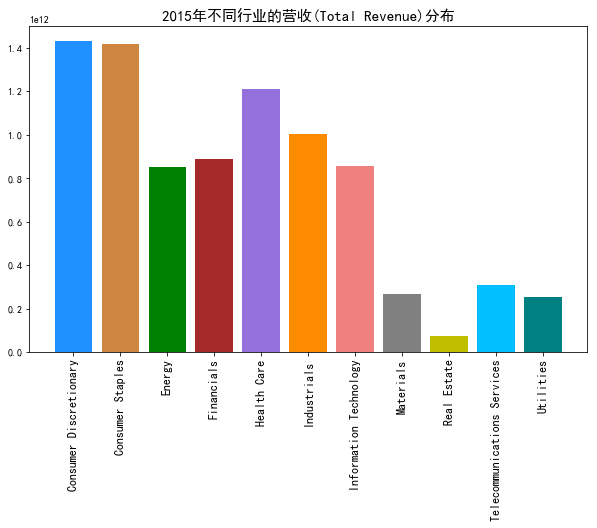

In [11]:
fig2 = plt.figure(figsize=(10,6))

height = [da for da in dat2['Total Revenue']]
colors = ['dodgerblue','peru','green','brown','mediumpurple','darkorange',
         'lightcoral','grey','y','deepskyblue','teal']  

plt.bar(range(len(dat2)), height, color = colors)
plt.xticks(range(len(dat2)), dat2.index, rotation=90, fontsize = 12)
plt.title("2015年不同行业的营收(Total Revenue)分布", fontsize = 15) 

plt.show()

3.

In [13]:
fdt3 = fdt[fdt['For Year']==2015.0]
fdt3 = fdt3.filter(items=['Ticker Symbol','Fixed Assets','Total Assets','Net Income','Total Revenue'])
fdt3.head()

,Ticker Symbol,Fixed Assets,Total Assets,Net Income,Total Revenue
3,AAL,2.751000e+10,4.841500e+10,7.610000e+09,4.099000e+10
7,AAP,1.434577e+09,8.134565e+09,4.733980e+08,9.737018e+09
10,AAPL,2.247100e+10,2.903450e+11,5.339400e+10,2.337150e+11
15,ABBV,2.565000e+09,5.305000e+10,5.144000e+09,2.285900e+10
18,ABC,1.192510e+09,2.796298e+10,-1.381650e+08,1.359618e+11


In [14]:
sec3 = sec1
dat3 = pd.merge(sec3,fdt3)
dat3 = dat3.filter(items=['GICS Sector','Fixed Assets','Total Assets','Net Income','Total Revenue'])
dat3 = dat3.groupby('GICS Sector').sum()
dat3['Fixed Assets/ Total Assets'] = dat3['Fixed Assets']/dat3['Total Assets']
dat3['Net Income/ Total Revenue'] = dat3['Net Income']/dat3['Total Revenue']
dat3 = dat3.filter(items=['Fixed Assets/ Total Assets','Net Income/ Total Revenue'])
dat3

,Fixed Assets/ Total Assets,Net Income/ Total Revenue
GICS Sector,,
Consumer Discretionary,0.293225,0.067028
Consumer Staples,0.294842,0.051854
Energy,0.672271,-0.067779
Financials,0.004314,0.159483
Health Care,0.095072,0.069882
Industrials,0.317894,0.097014
Information Technology,0.104765,0.175113
Materials,0.416645,0.037192
Real Estate,0.724267,0.189130


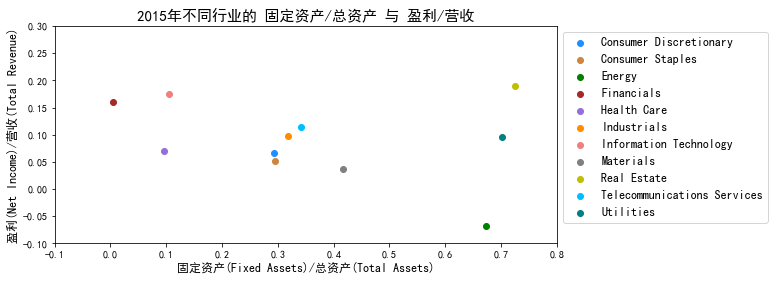

In [16]:
fig3 = plt.figure(figsize=(9,4))

plt.axis([-0.1,0.8,-0.1,0.3])
#plt.scatter(dat3['Fixed Assets/ Total Assets'],dat3['Net Income/ Total Revenue'], color = colors)
for i in range(len(dat3)):
    plt.scatter(dat3['Fixed Assets/ Total Assets'][i],dat3['Net Income/ Total Revenue'][i], color = colors[i])

plt.title("2015年不同行业的 固定资产/总资产 与 盈利/营收", fontsize = 15)     
plt.legend(dat3.index,bbox_to_anchor=(1,1), fontsize = 12)

plt.xlabel('固定资产(Fixed Assets)/总资产(Total Assets)', fontsize = 12)
plt.ylabel('盈利(Net Income)/营收(Total Revenue)', fontsize = 12)

plt.show()